<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnudarshan","key":"1d8ec5f91eb354a34e5f83e7a2d63912"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 670M/675M [00:19<00:00, 44.1MB/s]
100% 675M/675M [00:19<00:00, 36.3MB/s]


In [5]:
from zipfile import ZipFile
file_name = "cell-images-for-detecting-malaria.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**Split the datset**

In [0]:

import os

# initialize the path to the original input directory of images
orig_input_dataset = "/content/cell_images"

# initialize the base path to the new directory that will contain
# our images after computing the training and testing split
base_path = "content"

# derive the training, validation, and testing directories
train_path = os.path.sep.join([base_path, "training"])
val_path = os.path.sep.join([base_path, "validation"])
test_path = os.path.sep.join([base_path, "testing"])
 
# define the amount of data that will be used for training
train_split = 0.8
 
# the amount of validation data will be a percentage of the
# training data
val_split = 0.1


**Building the dataset**

In [0]:
from imutils import paths # which you need to download! 
import random
import shutil
import os

# shuffle all the images in the original input directory 
imagePaths = list(paths.list_images(orig_input_dataset))
random.seed(42)
random.shuffle(imagePaths)

In [0]:
# split the data into testing and training 
i = int(len(imagePaths) * train_split)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

# set aside some of the training data for validation data 
i = int(len(trainPaths) * val_split)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

# define the training/validation/testing datasets 
datasets = [
	("training", trainPaths, train_path),
	("validation", valPaths, val_path),
	("testing", testPaths, test_path)
    ]

In [13]:
for (dType, imagePaths, baseOutput) in datasets:
	# show which data split we are creating
	print("[INFO] building '{}' split".format(dType))
 
	# if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)
 
	# loop over the input image paths
	for inputPath in imagePaths:
		# extract the filename of the input image and its class label
		filename = inputPath.split(os.path.sep)[-1]
		label = inputPath.split(os.path.sep)[-2]
 
		# build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])
 
		# if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)
 
		# construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)

[INFO] building 'training' split
[INFO] 'creating content/training' directory
[INFO] 'creating content/training/Uninfected' directory
[INFO] 'creating content/training/Parasitized' directory
[INFO] building 'validation' split
[INFO] 'creating content/validation' directory
[INFO] 'creating content/validation/Uninfected' directory
[INFO] 'creating content/validation/Parasitized' directory
[INFO] building 'testing' split
[INFO] 'creating content/testing' directory
[INFO] 'creating content/testing/Parasitized' directory
[INFO] 'creating content/testing/Uninfected' directory


In [0]:
data_dir = '/content/content'

In [17]:
os.listdir(data_dir)

['testing', 'validation', 'training']

**Data Wrangling**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [19]:
train_path

'content/training'

In [20]:
test_path

'content/testing'

In [21]:
val_path

'content/validation'

In [22]:
os.listdir(train_path)

['Uninfected', 'Parasitized']

In [28]:
# Grab a single Parasitized image
os.listdir(train_path+'/Parasitized')[0]

'C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [29]:
para_cell = train_path + '/Parasitized' + '/C68P29N_ThinF_IMG_20150819_134830_cell_43.png'
para_cell

'content/training/Parasitized/C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [33]:
#imread automatically normalises the pixel values.
#imread(para_cell)
imread(para_cell).shape

(154, 130, 3)

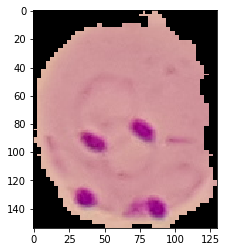

In [37]:
plt.imshow(imread(para_cell))